# Hackathon Recreation
Updated - 2020-11-16

Code used to recreate the results of the hackathon by running rigid registration and non-rigid registration using channel 2 on all three datasets and plotting (as well saving figures),

The three datasets used are the TMA multiplex (CycIF) images for BRCA, healthy breast, and tonsil tissue.

The workflow is always to run registration on a directory of tiffs saving new "registered" images with the same filename as the original images but in a new directory. Then we can run a function to calculate the error on each for each round by using the DAPI channel and round 1 as the target round. We do not register the quench round and the autolflourescence round (round 0). 

In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import sys
sys.path.append('..')

from mpleximreg import registration, viz
from pandas import concat, read_csv

In [3]:
# parameters
# unregistered data directories
brca_raw_dir = '/data/brca_unregistered_tifs'
hcc1143_raw_dir = '/data/hcc1143_unregistered_tifs'
tonsil_raw_dir = '/data/tonsil_unregistered_tifs'

# registered data directories - for saving registered images
brca_rigidreg_dir = '/data/brca_rigidreg_tifs'
hcc1143_rigidreg_dir = '/data/hcc1143_rigidreg_tifs'
tonsil_rigidreg_dir = '/data/tonsil_rigidreg_tifs'
brca_nonrigidreg_dir = '/data/brca_nonrigidreg_tifs'
hcc1143_nonrigidreg_dir = '/data/hcc1143_nonrigidreg_tifs'
tonsil_nonrigidreg_dir = '/data/tonsil_nonrigidreg_dir'

# directory with the text file for performing SimpleElastix non-rigid registration
txt_file_dir = '../simpleITK_nonrigidreg_files/'

## Rigid registration using round 1 as target and the DAPI channel
First we run registration saving the registered images into their own directories. Then we calculate the TRE error on those registered images using the DAPI channel and round 1 as target (TRE is calculated using the DAPI channel and round 1 as target no matter the registration method).

In [ ]:
registration.rigid_transform_dir(brca_raw_dir, brca_rigidreg_dir)
df1 = registration.tre_dir(brca_rigidreg_dir, 1, method='Rigid Registration with DAPI', dataset='BRCA (OHSU)',
                           save_path='../Data_Files/BRCA_hackathon_recreation_rigid_results.csv')

In [ ]:
registration.rigid_transform_dir(hcc1143_raw_dir, hcc1143_rigidreg_dir)
registration.tre_dir(hcc1143_rigidreg_dir, 1, method='Rigid Registration with DAPI', dataset='HCC1143 (OHSU)',
                     save_path='../Data_Files/HCC1143_hackathon_recreation_rigid_results.csv');

In [ ]:
registration.rigid_transform_dir(tonsil_raw_dir, tonsil_rigidreg_dir)
registration.tre_dir(tonsil_rigidreg_dir, 1, method='Rigid Registration with DAPI', dataset='Tonsil (OHSU)',
                     save_path='../Data_Files/Tonsil_hackathon_recreation_rigid_results.csv');

## Calculate the error using the non-registered images

In [ ]:
registration.tre_dir(brca_raw_dir, 'na', method='Unregistered', dataset='BRCA (OHSU)',
                     save_path='../Data_Files/BRCA_hackathon_recreation_noreg_results.csv')

In [ ]:
registration.tre_dir(hcc1143_raw_dir, 'na', method='Unregistered', dataset='HCC1143 (OHSU)',
                     save_path='../Data_Files/HCC1143_hackathon_recreation_noreg_results.csv')

In [ ]:
registration.tre_dir(tonsil_raw_dir, 'na', method='Unregistered', dataset='Tonsil (OHSU)',
                     save_path='../Data_Files/Tonsil_hackathon_recreation_noreg_results.csv')

## Non-rigid registration using round 2 + calculate the error of the registered images

In [ ]:
registration.nonrigid_transform_dir(brca_raw_dir, brca_nonrigidreg_dir, txt_file_dir, target_round=1, reg_channel=2)
df = registration.tre_dir(brca_nonrigidreg_dir, 2, method='Nonrigid Registration', dataset='BRCA (OHSU)',
                     save_path='../Data_Files/BRCA_hackathon_recreation_nonrigid_results.csv')

In [ ]:
registration.nonrigid_transform_dir(hcc1143_raw_dir, hcc1143_nonrigidreg_dir, txt_file_dir, target_round=1, reg_channel=2)
registration.tre_dir(hcc1143_nonrigidreg_dir, 2, method='Nonrigid Registration', dataset='HCC1143 (OHSU)',
                     save_path='../Data_Files/HCC1143_hackathon_recreation_nonrigid_results.csv');

In [4]:
registration.nonrigid_transform_dir(tonsil_raw_dir, tonsil_nonrigidreg_dir, txt_file_dir, target_round=1, reg_channel=2)
registration.tre_dir(tonsil_nonrigidreg_dir, 2, method='Nonrigid Registration', dataset='Tonsil (OHSU)',
                     save_path='../Data_Files/Tonsil_hackathon_recreation_nonrigid_results.csv');

Registering round 5
Registering round 7
Registering round 2
Registering round 6
Registering round 10
Registering round 11
Registering round 8
Registering round 9
Registering round 4
Registering round 3
Calculating for round 5
Calculating for round 7
Calculating for round 2
Calculating for round 6
Calculating for round 10
Calculating for round 11
Calculating for round 8
Calculating for round 9
Calculating for round 4
Calculating for round 3


## Plot results of hackathon recreation

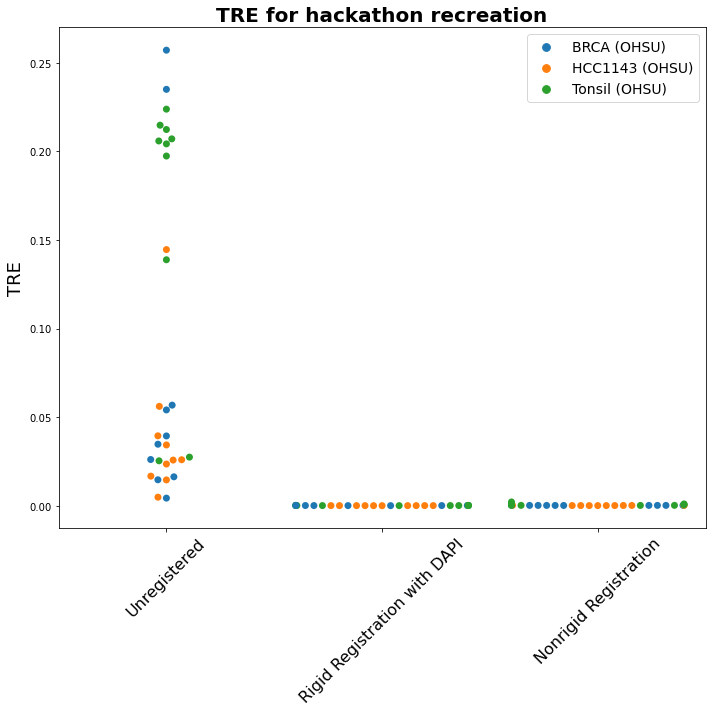

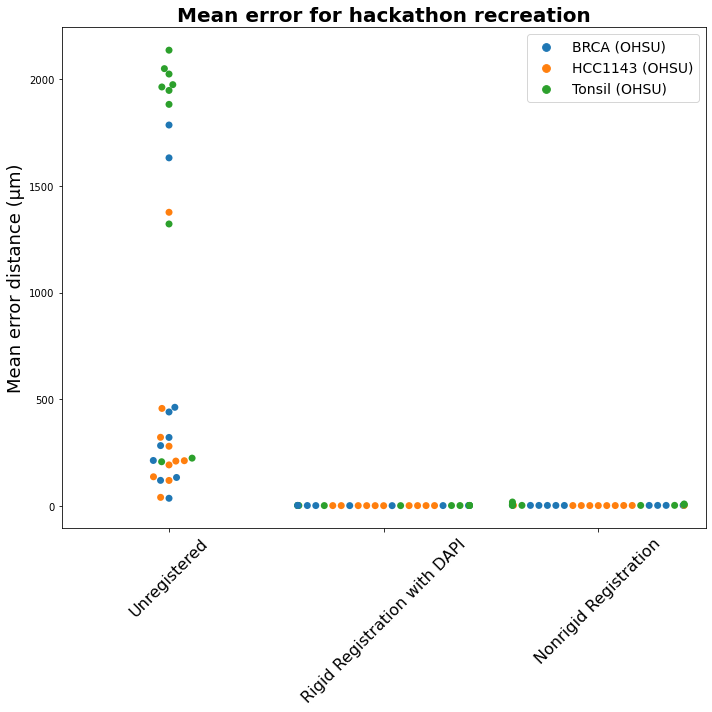

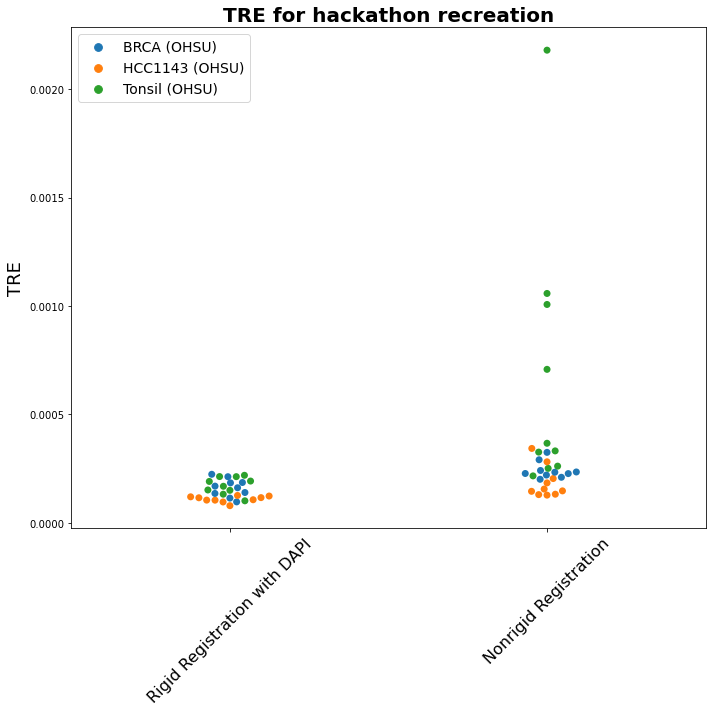

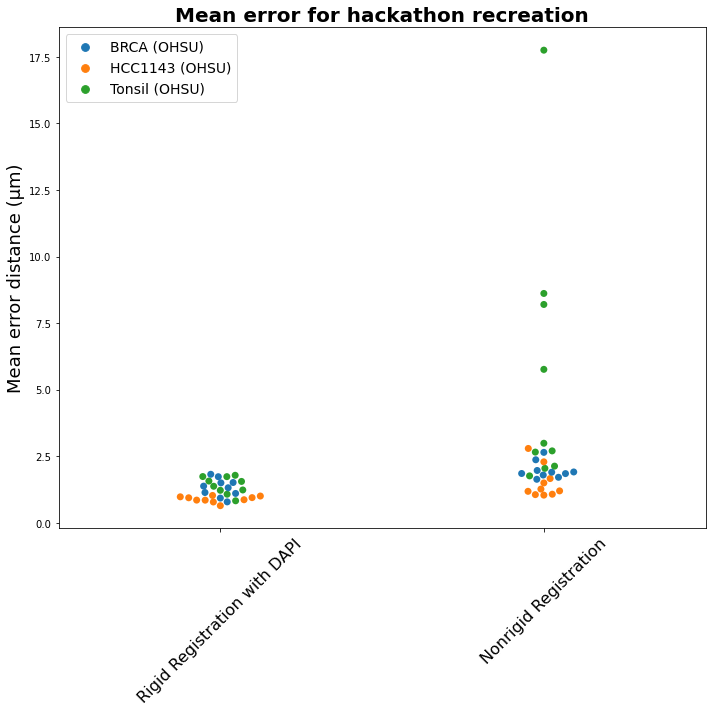

In [45]:
# concatenate all the dataframes
df = concat([
    read_csv('../Data_Files/BRCA_hackathon_recreation_rigid_results.csv'),
    read_csv('../Data_Files/HCC1143_hackathon_recreation_rigid_results.csv'),
    read_csv('../Data_Files/Tonsil_hackathon_recreation_rigid_results.csv'),
    read_csv('../Data_Files/BRCA_hackathon_recreation_noreg_results.csv'),
    read_csv('../Data_Files/HCC1143_hackathon_recreation_noreg_results.csv'),
    read_csv('../Data_Files/Tonsil_hackathon_recreation_noreg_results.csv'),
    read_csv('../Data_Files/BRCA_hackathon_recreation_nonrigid_results.csv'),
    read_csv('../Data_Files/HCC1143_hackathon_recreation_nonrigid_results.csv'),
    read_csv('../Data_Files/Tonsil_hackathon_recreation_nonrigid_results.csv')
], ignore_index=True)

order = ['Unregistered', 'Rigid Registration with DAPI', 'Nonrigid Registration']
viz.pretty_swarm_plot(df, save_path='../Figures/HackathonRecreation')

order = ['Rigid Registration with DAPI', 'Nonrigid Registration']
viz.pretty_swarm_plot(df, save_path='../Figures/HackathonRecreation_regOnly', order=order)